In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 

## Exotic Derivatives

Pricing approach:
- Start with some financial products
- Model the risk factors involved
- Calibrate the model to market data
- Model product price correspondingly
- Price the product of interests 
- Set up a hedge to remove the risk

## Binaries and digitals
Binary options have a discontinuos payoff at expiry. 
An example for a binary call is that the contract pays $Q$ at T, if the asset price is then greater than the exercise price K. 
The final condition is $V(S,T) = \mathcal{H}(S-K)$, where $\mathcal{H}$(.) is the Heaviside function
$$ V(S,T) = Q\mathbb{1}_{S\geq  K}

## Compound option:
Call on a call: right to buy a call with maturity T and strike K' at time $T_0$ for the price $K_0$:
$$ V^{CC}(S,T_0,K_0,K,T) = max[V^C(S,K,T) - K_0,0]

## Chooser option
Gives the holder the right to choose wheter the underlying option at time $T_0$ is a Call or a Put with the same strike $K$ at maturity $T$. The payoff of a chooser option is:
$$ V^{CH}(S,K,T_0,T)=max[V^C(S,K,T), V^P(S,K,T)]$$

Value of the contract at t0 =0.48930385567059775
Value of the barrier contract at t0 =0.14917196514936862


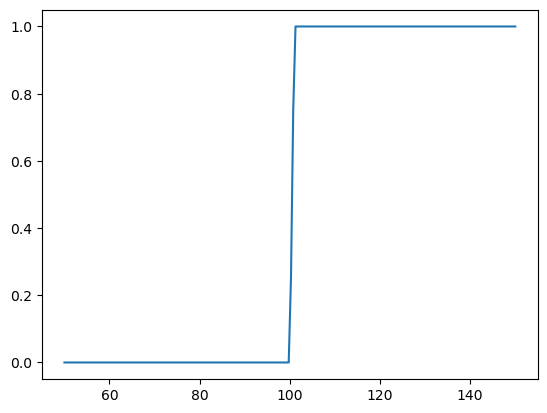

In [5]:
#%%


def DigitalPayoffValuation(S,T,r,payoff):
    # S is a vector of Monte Carlo samples at T
    return np.exp(-r*T) * np.mean(payoff(S))

def GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
   
    # Euler Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0
    
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])
        time[i+1] = time[i] +dt
        
    # Retun S1 and S2
    paths = {"time":time,"S":S1}
    return paths

def UpAndOutBarrier(S,T,r,payoff,Su):
        
    # handling of a barrier
    n1,n2 = S.shape
    barrier= np.zeros([n1,n2]) + Su
    
    hitM = S > barrier
    hitVec = np.sum(hitM, 1)
    hitVec = (hitVec == 0.0).astype(int)
    
    V_0 = np.exp(-r*T) * np.mean(payoff(S[:,-1]*hitVec))

    
    return V_0

def mainCalculation():
    NoOfPaths = 10000
    NoOfSteps = 250
   
    S0    = 100.0
    r     = 0.05
    T    = 5
    sigma = 0.2
    Su = 150
    
    paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S0)
    S_paths= paths["S"]
    S_T = S_paths[:,-1]
    
    # Payoff setting    
    K  = 100.0
    K2 = 101.0
    
    # Payoff specification
    payoff = lambda S: np.maximum(S-K,0.0) - np.maximum(S-K2,0)
    
    #Plot
    S_T_grid = np.linspace(50,S0*1.5,200)
    
    plt.figure(1)
    plt.plot(S_T_grid,payoff(S_T_grid))
    
    # Valuation
    val_t0 = DigitalPayoffValuation(S_T,T,r,payoff)
    print("Value of the contract at t0 ={0}".format(val_t0))
    
    # barrier pricing
    barrier_price = UpAndOutBarrier(S_paths,T,r,payoff,Su)

    print("Value of the barrier contract at t0 ={0}".format(barrier_price))
           
        
mainCalculation()

## Barrier Options
Barrier options are options that either come alive or die when predetermined trigger points (barriers) are reached.
- Up-and_out Call: Option is knocked out if S hits a certain barrier $S_u$
$$ V(S,T) = max(S-K,0) \text{ if } S\geq S_u$$

## Lookback options:
Path dependent options whose payoffs depend on the max or the min of the asset during a certain period (lookback period $[T_0,T]$
- Payoff European fixed strike lookback call: $(max_{[T_0,T]}(S(t) - K)^+$
- Payoff European fixed strike lookback put: $ (K - min_{[T_0,T]}(S(t)))^+$

## Type of Barriers
- Out options only payoffs if a level is not reached. If the barrier is reached the options is said to have knocked out
- The in option pays off as long as a level is reached before expiry. If the barrier is reached thenthe options is said to have knocked in. 
- If the barrier is above the initial asset value, we have an up option
- if the barrier is below the initial value, we have a down option
- Barrier can be time dependent

## PDE For Barrier Options
- The PDE for barrier options satisfy the Black-Scholes equation on a special domain, with special boundary conditions.
- The details of the barrier feature come in through the specification of boundary conditions
- If the asset reaches the barrier $S_u$ in an "out" barrier option then the contract becomes worthless:
$$ V(S_u,t)=0 \text{ for } t <T$$
- if we have a down-and-out option with a barrier $S_d$ we solve for $ S_d < S > \inf$ with 
$$ V(S_d,t)=0 \text{ for } t <T$$

## In barriers

An "in" option only has payoff if the barrier is  triggered. If the barrier is not triggered we have 
$$ V(S,T)=0$$
The value in the option is in the potential to hit the barrier. If the option is an up-and-in contract then on the upper barrier the contract must have the same value of a vanilla option. 
$$ V(S_u,t) = \text{ value of standard option contract, function of t }$$ 
So,
$$ V(S_u,t) = V_c(S_u,t) \text{ for } t<T$$
Moreover, one can show that "in" + "out" = European

Value of the contract at t0 =29.495518018678546
Value of the barrier contract at t0 =2.7266203294527416


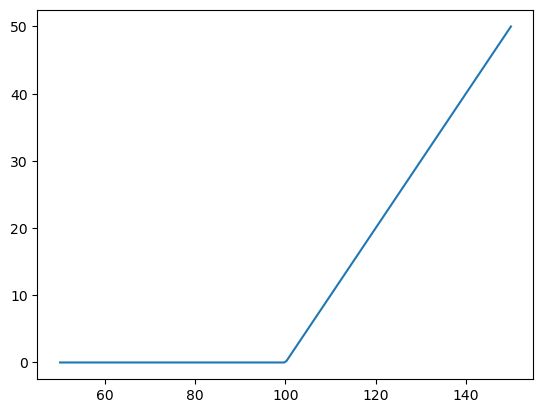

In [6]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 

def DigitalPayoffValuation(S,T,r,payoff):
    # S is a vector of Monte Carlo samples at T
    return np.exp(-r*T) * np.mean(payoff(S))

def GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
   
    # Euler Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0
    
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])
        time[i+1] = time[i] +dt
        
    # Retun S1 and S2
    paths = {"time":time,"S":S1}
    return paths

def UpAndOutBarrier(S,T,r,payoff,Su):
        
    # handling of a barrier
    n1,n2 = S.shape
    barrier= np.zeros([n1,n2]) + Su
    
    hitM = S > barrier
    hitVec = np.sum(hitM, 1)
    hitVec = (hitVec == 0.0).astype(int)
    
    V_0 = np.exp(-r*T) * np.mean(payoff(S[:,-1]*hitVec))

    
    return V_0

def mainCalculation():
    NoOfPaths = 10000
    NoOfSteps = 250
   
    S0    = 100.0
    r     = 0.05
    T    = 5
    sigma = 0.2
    Su = 150
    
    paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S0)
    S_paths= paths["S"]
    S_T = S_paths[:,-1]
    
    # Payoff setting    
    K  = 100.0
    K2 = 140.0
    
    # Payoff specification
    payoff = lambda S: np.maximum(S-K,0.0)# - np.maximum(S-K2,0)
    
    #Plot
    S_T_grid = np.linspace(50,S0*1.5,200)
    
    plt.figure(1)
    plt.plot(S_T_grid,payoff(S_T_grid))
    
    # Valuation
    val_t0 = DigitalPayoffValuation(S_T,T,r,payoff)
    print("Value of the contract at t0 ={0}".format(val_t0))
    
    # barrier pricing
    barrier_price = UpAndOutBarrier(S_paths,T,r,payoff,Su)

    print("Value of the barrier contract at t0 ={0}".format(barrier_price))
           
        
mainCalculation()

## Hedging barrier options

- Barrier options have discontinuos delta at the barrier. For a knock out, the option value is continuos, decreasing approximately continuosly towards the barrier, then being zero beyond the barrier. 
- A discontinuity in the delta means that the gamma is instantaneously infinite at the barrier. Delta hedging through the barrier is virtually impossible and costly. 
- There have been a number of suggestions made for ways to statically hedge barrier options. These methods try to mimic as closely as possible the value of a barrier option with vanilla calls and puts or with binary options

## Asian Options
The option payoff dependes on the average of the underlying:
- $V(T) = max(A(T) - K,0)$: fixed strike call
- $V(T) = max(K - A(T),0)$: fixed strike put
- $V(T) = max(S(T) - A(T),0)$: floating strike call
- $V(T) = max(A(T) - S(T),0)$: floating strike put
Where $A(T)$ represents an average of stock S(t) computed over certain period of time

## Types of average
- Arithmetic average:
$$ \frac{1}{N}\sum_i^N S(t_i)$$
- Geometric average:
$$ A_n = \prod_i^N S^{\frac{1}{n}}(t_i)$$

- Continuos average:
$$ A(t) = \frac{1}{t} \int_{0}^{t} S(u)du $$

Final conditions for an arithmetic-average floating strike call:
$$ V(S,T) = max\bigg(S -\frac{1}{T} \int_0^T S(u)du, 0\bigg) $$
for an arithmetic-average fixed strike call:
$$ V(S,T) = max(\frac{1}{T}\int_0^T S(u)du - K , 0\bigg)$$

with a new variable $I(t) \coloneqq \int_0^T S(u)du$ one finds a similar Black-Scholes equation for Asian options:
$$\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2\frac{\partial^2 V}{\partial ^2 S} + rs \frac{\partial V}{\partial S} + S \frac{\partial V}{\partial I} - rV=0$$

## Path dependency and the Integral
- the stock process follows a GBM
$$ dS(t) =rS(t)dt + \sigma S(t)dW^{\mathbb{Q}}(t)$$
- Imagine a contract that pays at maturity T an amount that is a function of the path taken by the asset between 0 and maturity.
- Suppose that this path-dependent quantity can be represented by an integral of some function of the asset over the period $0$ to $T$:
$$ I(T) = \int_0^T f(S,u) du$$
Most path-dependent quantities in exotic derivate contracts can be written in this form with a suitable choice of $f(S,t)$

Set up a portfolio containing one of the path-dependent options and short a  number $\Delta$ of the underlying asset:
$$ \Pi = V(S,I,t) - \Delta \cdot S $$
the change in the value of this portfolio is given by:
$$ d\Pi = \bigg( \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2 \frac{\partial^2 V}{\partial S^2}\bigg) + f(S,t)\frac{\partial V}{\partial I} + \bigg(\frac{\partial V}{\partial S} - \Delta\bigg)dS$$

Choosing $\Delta = \frac{\partial V}{\partial S}$ to hedge the risk we find:
$$ d\Pi =  \bigg( \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2 \frac{\partial^2 V}{\partial S^2} + f(S,t)\frac{\partial V}{\partial I}\bigg)dt $$
$$ d\Pi = r\Pi dt $$

leading to the PDE:
$$  \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2 \frac{\partial^2 V}{\partial S^2} + f(S,t)\frac{\partial V}{\partial I} + rS \frac{\partial V}{\partial S} - rV =0 $$


Subject to the terminal condition:
$$V(S,I,T) = payoff $$

In [7]:
def PayoffValuation(S,T,r,payoff):
    # S is a vector of Monte Carlo samples at T
    return np.exp(-r*T) * np.mean(payoff(S))

def GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
   
    # Euler Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0
    
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])
        time[i+1] = time[i] +dt
        
    # Retun S1 and S2
    paths = {"time":time,"S":S1}
    return paths


def mainCalculation():
    NoOfPaths = 5000
    NoOfSteps = 250
   
    S0    = 100.0
    r     = 0.05
    T    = 5
    sigma = 0.2
     
    paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S0)
    S_paths= paths["S"]
    S_T = S_paths[:,-1]
    
    # Payoff setting    
    K  = 100.0
    
    # Payoff specification
    payoff = lambda S: np.maximum(S-K,0.0)  
        
    # Valuation
    val_t0 = PayoffValuation(S_T,T,r,payoff)
    print("Value of the contract at t0 ={0}".format(val_t0))
    
    
    A_T= np.mean(S_paths,1)
    valAsian_t0 = PayoffValuation(A_T,T,r,payoff)
    print("Value of the Asian option at t0 ={0}".format(valAsian_t0))
    
    print('variance of S(T) = {0}'.format(np.var(S_T)))
    print('variance of A(T) = {0}'.format(np.var(A_T)))
        
mainCalculation()

Value of the contract at t0 =28.967509179090808
Value of the Asian option at t0 =14.778907839025736
variance of S(T) = 3581.7248430269537
variance of A(T) = 916.135131411
